<a href="https://colab.research.google.com/github/aulia-anhar/capstone-obesity-prediction/blob/main/obesity-calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Obesity Classification with Machine Learning**

# 1. Impor Library & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Tampilkan semua kolom saat dipanggil
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Semester 6/BengkelKoding/obesity-prediction/Dataset/ObesityDataSet.csv')

# Tampilkan 5 baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


#2. Informasi Umum Dataset

In [6]:
# Informasi jumlah baris, kolom, dan tipe data
print("Informasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [7]:
# Deskripsi statistik (khusus data numerik)
print("\nDeskripsi Statistik:")
df.describe()



Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


# 3. Cek Missing Values, Unique Values, dan Duplikat

In [8]:
# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [9]:
# Cek nilai unik tiap kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [10]:
# Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
18


# 4. Visualisasi Data

**4.1 Korelasi antar fitur numerik**

mengonversi kolom-kolom numerik seperti Age, Height, Weight, CH2O, FAF, dan TUE ke tipe float. dengan melakukan langkah-langkah berikut:

1. Mengonversi kolom numerik ke float.

2. Menghapus baris yang gagal dikonversi (jika ada).

3. Menampilkan heatmap korelasi antar fitur numerik.


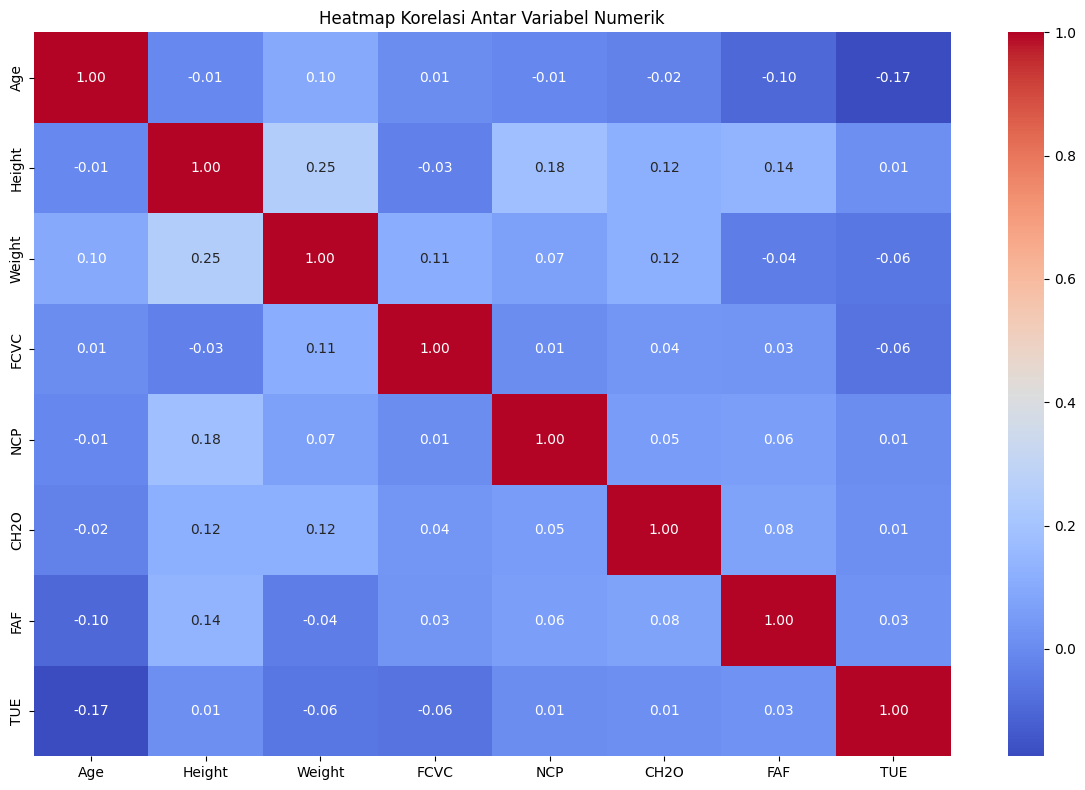

In [12]:
# 4.1 Korelasi antar fitur numerik

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang akan dikonversi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom ke float
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop baris dengan nilai NaN (hasil konversi gagal)
df_cleaned = df.dropna(subset=numeric_columns)

# Korelasi dan heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.tight_layout()
plt.show()



**4.2 Distribusi Kelas (Target Balance)**

> Add blockquote



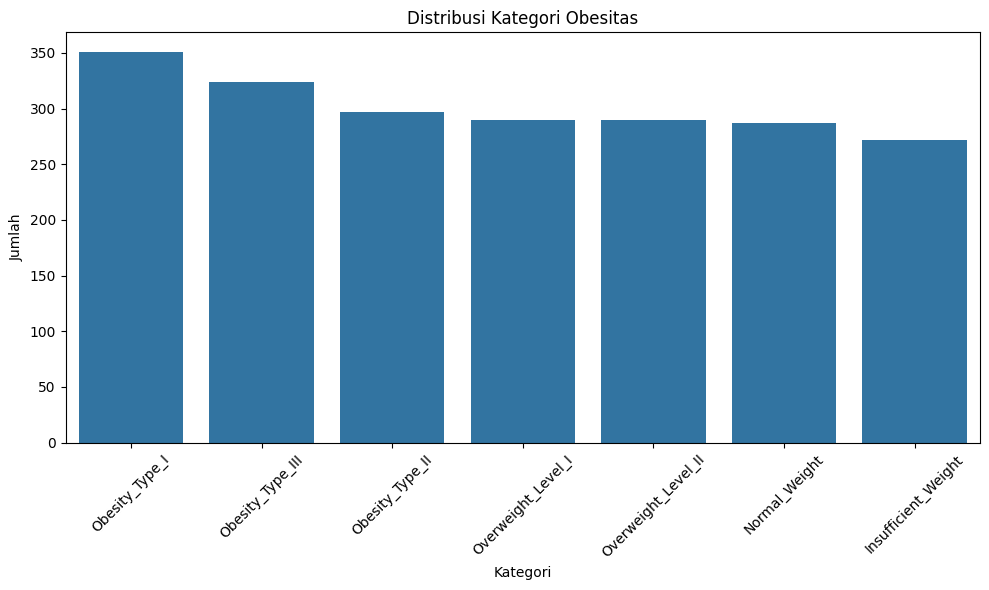

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


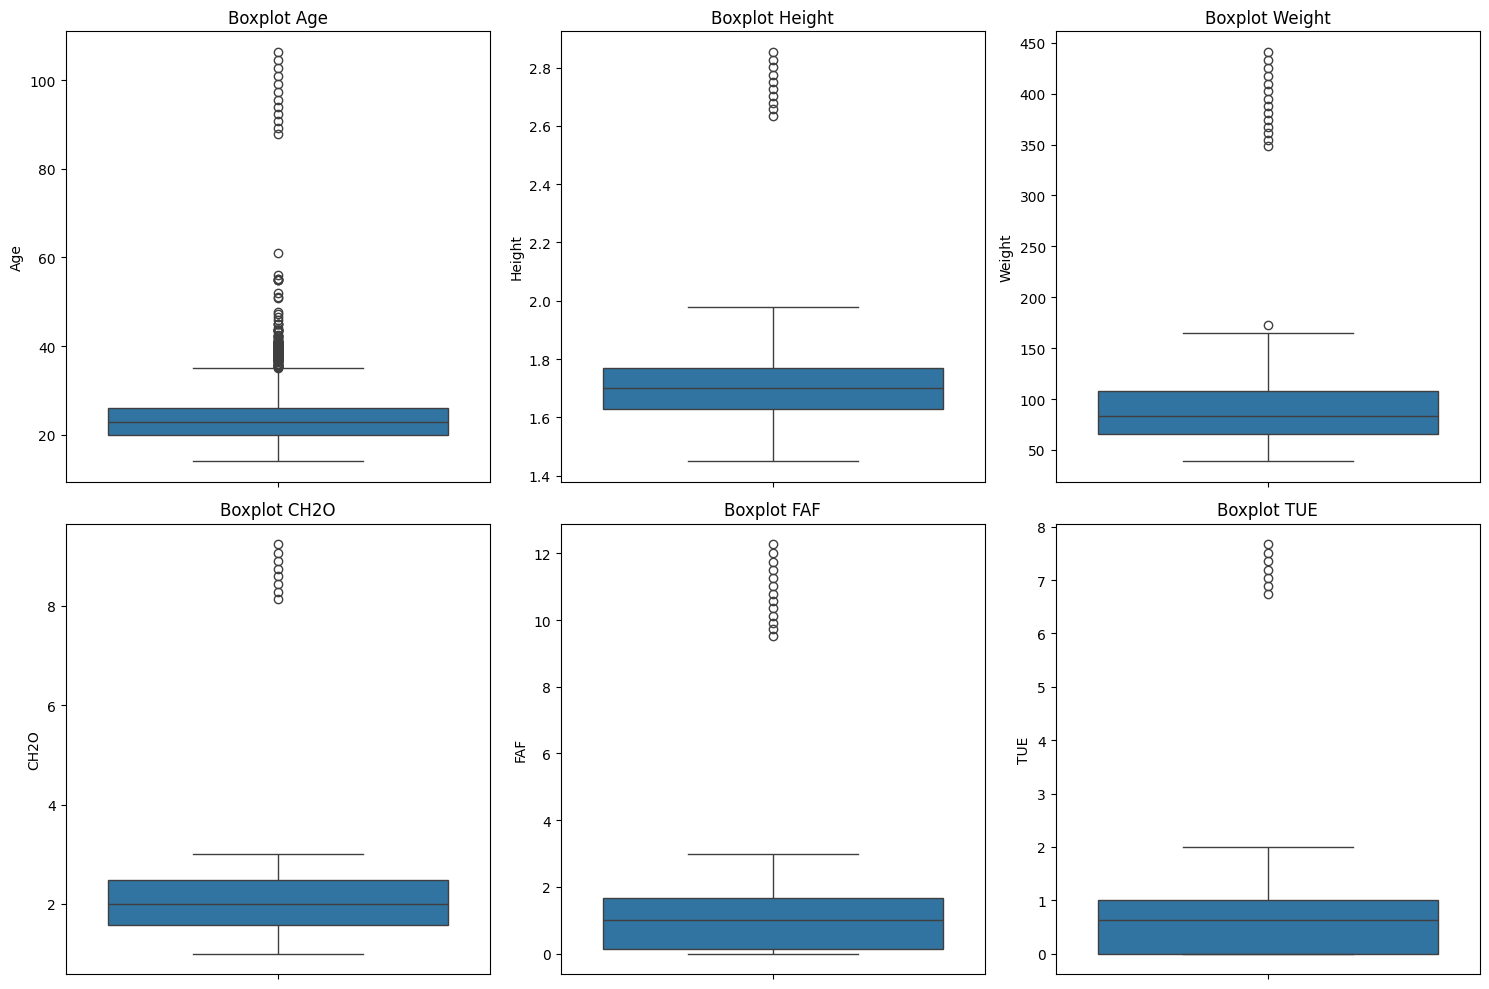

In [14]:
# Kolom numerik kontinu untuk deteksi outlier
numeric_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


# **Hasil Proses Exploratory Data Analysis (EDA)**

**1. Informasi Umum Dataset**

*   Jumlah entri: 2111 baris
*   Jumlah kolom: 17
*   Semua kolom bertipe object, yang berarti data numerik seperti Age, Height, dan Weight masih berupa string dan perlu dikonversi ke tipe numerik untuk analisis lebih lanjut.
*   Beberapa kolom memiliki nilai hilang (missing values).

**2. Statistik Deskriptif Kolom Numerik**

* Nilai-nilai ini tidak dapat dihitung sekarang karena semua kolom numerik masih dalam format object. Namun, berdasarkan ringkasan:

* Terdapat ribuan nilai unik dalam kolom numerik seperti Height dan Weight, menandakan data belum dibersihkan atau dikonversi ke tipe yang sesuai.

**3. Missing Values**

Kolom dengan nilai kosong (missing):

* Age, Height, Weight, FCVC, NCP, SCC, CH2O, FAF, TUE, MTRANS, dan lainnya memiliki sejumlah kecil nilai kosong (rata-rata kurang dari 20 dari 2111 baris).

* Tidak terlalu signifikan, namun perlu penanganan (misalnya imputasi).


 **4. Nilai Unik**

Beberapa kolom memiliki jumlah nilai unik yang sangat besar (ribuan), seperti:

* Age: 1394 nilai unik

* Height: 1562 nilai unik

* Weight: 1518 nilai unik

Hal ini menunjukkan kemungkinan Nilai desimal disimpan sebagai string dan Inkonsistensi format Sehingga Perlu konversi ke float dan standarisasi

**5. Duplikat**

Tidak ditemukan data duplikat pada dataset ini.

**6. Distribusi Kelas (Target: NObeyesdad)**

Distribusi kategori obesitas:

* Obesity Type I: 351

* Obesity Type III: 324

* Obesity Type II: 297

* Overweight Level I & II: 290 masing-masing

* Normal Weight: 287

* Insufficient Weight: 272

Distribusi relatif seimbang, artinya tidak ada dominasi kelas yang ekstrem — kondisi ideal untuk model klasifikasi.

**7. Deteksi Outlier**

Statistik deskriptif pada fitur numerik belum tersedia sepenuhnya karena semua masih dalam tipe object. Namun, berdasarkan frekuensi:

Banyak nilai duplikat seperti 80, 1.7, dan 18 muncul sering. Perlu konversi ke float dan eksplorasi lanjut untuk membuat boxplot dan mendeteksi outlier.




# **Kesimpulan EDA Sementara**

1. Dataset relatif bersih dari duplikasi dan cukup seimbang secara label target.

2. Banyak fitur numerik masih dalam format teks (object) — perlu dikonversi agar bisa digunakan untuk visualisasi dan pemodelan.

3. Missing values kecil dan bisa diimputasi dengan rata-rata atau median.

4. Perlu proses pembersihan data sebelum melakukan visualisasi lanjutan dan training model.

5. Visualisasi Data

* **Korelasi Antar Variabel Numerik**
  menunjukan Tidak ada hubungan linear yang dominan antara fitur numerik, sehingga untuk prediksi, perlu mempertimbangkan model non-linear atau teknik feature engineering lainnya.

* **Distribusi Kategori Obesitas**
  menunjukan Dataset ini cukup seimbang antar kelas target, yang baik untuk klasifikasi karena tidak terlalu bias terhadap satu kategori.

* **Boxplot Variabel Numerik**
  Perlu dilakukan penanganan outlier, terutama pada Weight, Age, dan FAF, karena dapat memengaruhi hasil model prediktif secara signifikan

